In [2]:
import os
import random
import collections
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
from itertools import chain
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [3]:
def getEmails( folder ):
    '''
        Given a folder to retrieve from, 
        returns a list where each item is a list of the words in an email
    '''
    emails = []
    file_list = os.listdir( folder )
    for a_file in file_list:
        with open(folder + '/' + a_file, 'r') as f:
            emails.append( f.read() )
     
    return [ [ w for w in email.split() if w.isalpha() ] for email in emails ]

def probabilities( emails ):
    '''
        Given a list were each item is a list of words,
        returns a dictionary that map words to probabilties
    '''
    rm_dups = lambda l : list(set( l ))
    counter = collections.Counter( sum( map(rm_dups, emails), [] ) )
    return { k : v / len( emails ) for k, v in counter.items() }

def getMostProbable( dist, n ):
    '''
        Given a probability distribution and a number of instances to get,
        returns the n most probable instances
    '''
    items = list( dist.items() )
    items.sort( key = lambda x : -x[1] )
    return dict( items[ : n ] )

def plotHist( dist ):
    '''
        Plots a probablity distribution as a histogram
    '''
    items = list( dist.items() )
    items.sort( key = lambda x : -x[1] )
    author_names = [ k for k, v in items ]
    author_counts = [ v for k, v in items ]

    # Plot histogram using matplotlib bar().
    indexes = np.arange(len(author_names))
    width = 0.7
    pylab.rcParams['figure.figsize'] = (32.0, 5.0)
    plt.bar( indexes, author_counts, width)
    plt.xticks(indexes + width * 0.5, author_names, rotation = 45)
    plt.show()
    
def histDifference( h1, h2 ):
    '''
        Given two probability distributions,
        returns a new distribution representing a key-wise difference
    '''
    return { k : h1[ k ] - h2[ k ] for k in h1.keys() if k in h2 }

Top 30 words that positively identify spam


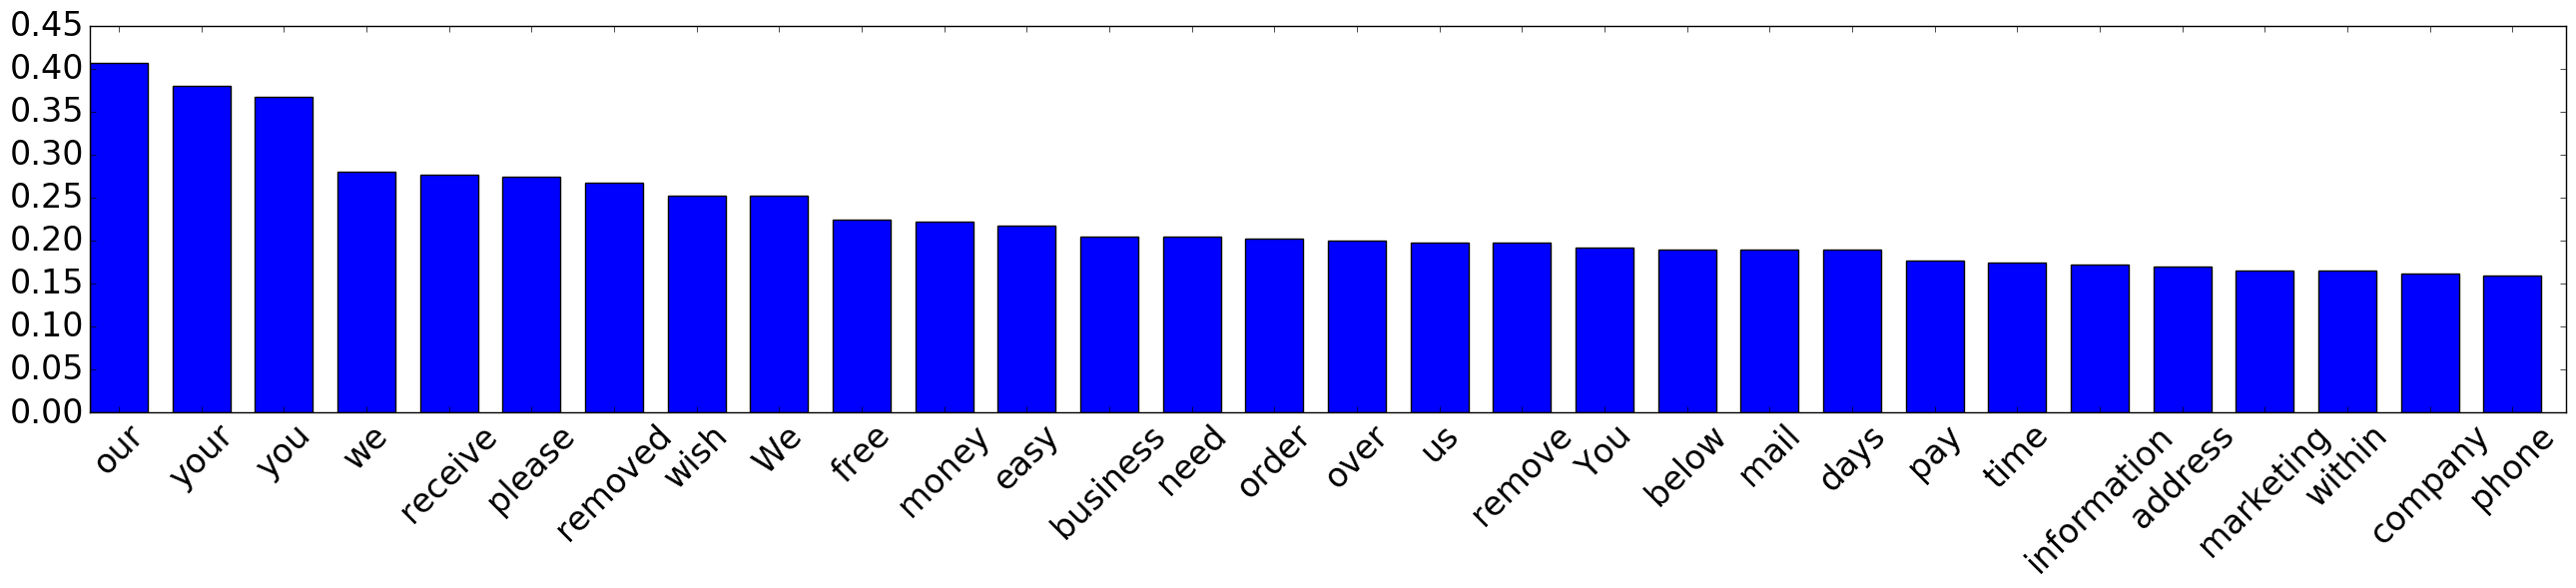

Top 30 words that positively identify ham


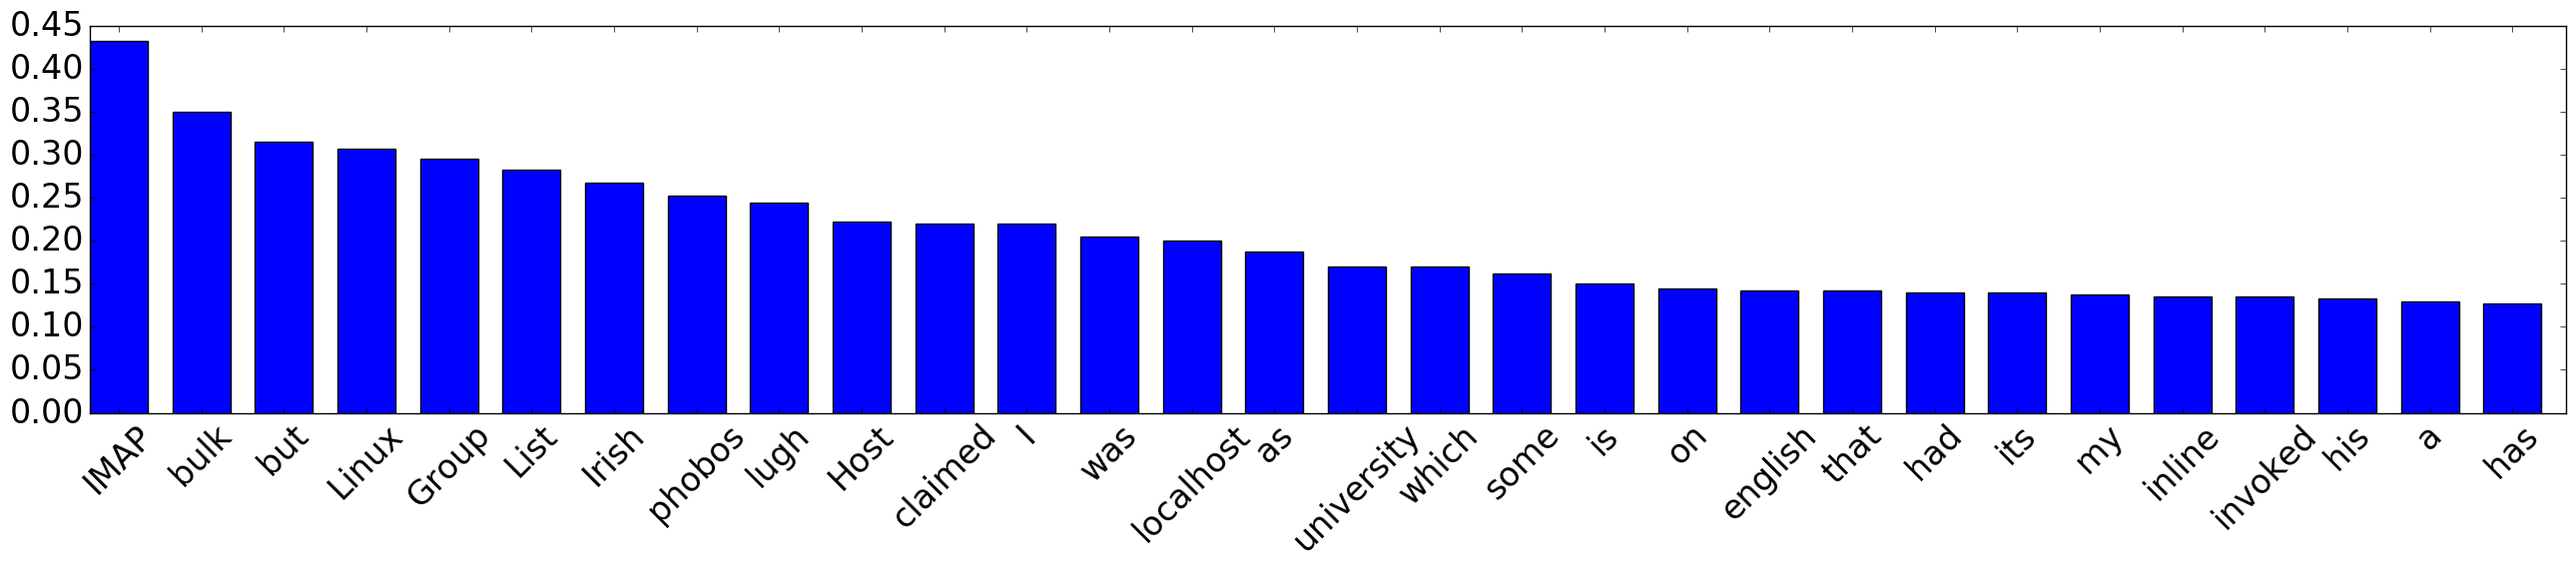

In [4]:
spamProbs = probabilities( getEmails( 'spam') )
hamProbs  = probabilities( getEmails( 'ham' ) )

spamHamDiff = histDifference( spamProbs, hamProbs )
print( 'Top 30 words that positively identify spam' )
plotHist( getMostProbable( spamHamDiff, 30 ) )

hamSpamDiff = histDifference( hamProbs, spamProbs )
print( 'Top 30 words that positively identify ham' )
plotHist( getMostProbable( hamSpamDiff, 30 ) )

Top 10 most identifying words across both classes


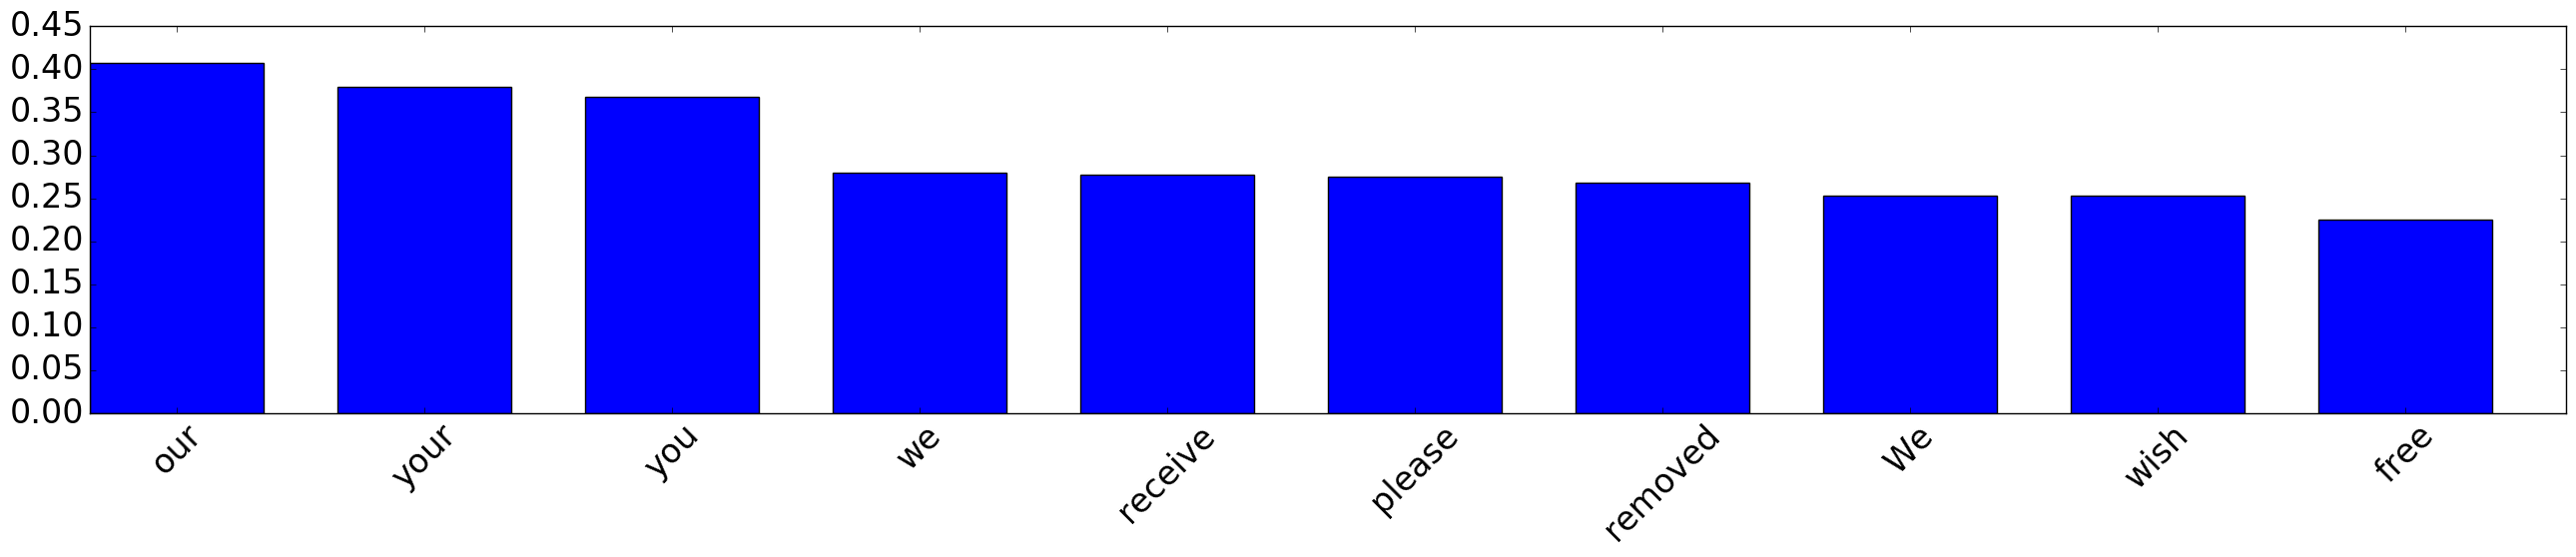

In [5]:
n = 10
print( 'Top %i most identifying words across both classes' % n )
mostIdentifying = getMostProbable( dict( chain( hamSpamDiff.items(), spamHamDiff.items() ) ), n )
plotHist( mostIdentifying )

In [37]:
def pickingMostIdentifying( n, random_state = 0 ):
    mostIdentifying = getMostProbable( dict( chain( hamSpamDiff.items(), spamHamDiff.items() ) ), n )
    featureWords = mostIdentifying.keys()
    spamEmails = getEmails( 'spam' )
    hamEmails = getEmails( 'ham' )

    X = np.matrix([[ w in e for w in featureWords ] for e in chain( spamEmails, hamEmails )])
    y = [ 1 ] * len( spamEmails ) + [ 0 ] * len( hamEmails )
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.95, random_state = random_state )

    clf = BernoulliNB()
    clf.fit( X_train, y_train )
    return clf.score( X_test, y_test ) 

In [40]:
pickingMostIdentifying( 10 )

0.84210526315789469